In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
STOCK_FILES = [
    "AAPL_historical_data.csv", "AMZN_historical_data.csv", "GOOG_historical_data.csv",
    "META_historical_data.csv", "MSFT_historical_data.csv", "NVDA_historical_data.csv",
    "TSLA_historical_data.csv"
]

In [6]:
def load_data(path):
    return pd.read_csv(path)

In [7]:
def explore_stock_data(file_path, output_dir="outputs/stocks"):
    os.makedirs(output_dir, exist_ok=True)
    df = load_data(file_path)
    stock_name = os.path.basename(file_path).split("_")[0]
    
    # Summary
    print(f"\n🟢 {stock_name} Summary:")
    print("Shape:", df.shape)
    print(df.dtypes)
    print(df.isnull().sum())
    
    # Price distribution
    if 'Close' in df.columns:
        plt.figure()
        sns.histplot(df['Close'], kde=True)
        plt.title(f"{stock_name} Closing Price Distribution")
        plt.savefig(f"{output_dir}/{stock_name}_close_dist.png")
        plt.close()

In [8]:
def explore_analyst_ratings(file_path, output_dir="outputs/ratings"):
    os.makedirs(output_dir, exist_ok=True)
    df = load_data(file_path)
    
    print("\n🟣 Analyst Ratings Summary:")
    print("Shape:", df.shape)
    print(df.dtypes)
    print(df.isnull().sum())
    print(df.describe(include='all'))
    
    if 'rating' in df.columns:
        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
        plt.title("Rating Counts")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f"{output_dir}/rating_distribution.png")
        plt.close()

In [12]:
if __name__ == "__main__":
    raw_data_dir = "C:/Users/Admin/source/repos/KAIM/KAIM-Week1/Nova-Financial-Solutions-Week1/data/raw"

    for file in STOCK_FILES:
        explore_stock_data(os.path.join(raw_data_dir, file))

    explore_analyst_ratings(os.path.join(raw_data_dir, "raw_analyst_ratings.csv"))


🟢 AAPL Summary:
Shape: (10998, 9)
Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

🟢 AMZN Summary:
Shape: (6846, 9)
Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

🟢 GOOG Summary:
Shape: (5020, 9)
Date             object
Open            float64
High            float64
Low            

In [14]:
# Initial Exploration, EDA, and Data Cleaning for Stock Data

from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)

# Define data path
data_path = Path("C:/Users/Admin/source/repos/KAIM/KAIM-Week1/Nova-Financial-Solutions-Week1/data/raw")
stock_files = [
    "AAPL_historical_data.csv",
    "AMZN_historical_data.csv",
    "GOOG_historical_data.csv",
    "META_historical_data.csv",
    "MSFT_historical_data.csv",
    "NVDA_historical_data.csv",
    "TSLA_historical_data.csv"
]

In [15]:
# Load all stock data into a dictionary
stocks_data = {}
for file in stock_files:
    df = pd.read_csv(data_path / file)
    stock_name = file.split("_")[0]
    df['Stock'] = stock_name
    df['Date'] = pd.to_datetime(df['Date'])
    stocks_data[stock_name] = df


In [16]:
# Combine all stock data into a single DataFrame
all_stocks_df = pd.concat(stocks_data.values(), ignore_index=True)

# Preview the combined DataFrame
print("Combined Data Sample:")
display(all_stocks_df.head())

# Check for missing values
print("\nMissing Values Summary:")
display(all_stocks_df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
display(all_stocks_df.describe(include='all'))

Combined Data Sample:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL



Missing Values Summary:


Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
Stock           0
dtype: int64


Summary Statistics:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock
count,45428,45428.000000,45428.000000,45428.000000,45428.000000,45428.000000,4.542800e+04,45428.000000,45428.000000,45428
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AAPL
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10998
mean,2009-04-26 08:53:21.549704960,46.798370,47.397792,46.190101,46.810590,45.367891,2.177785e+08,0.000847,0.002499,NaN
min,1980-12-12 00:00:00,0.034896,0.035547,0.033333,0.034115,0.031291,0.000000e+00,0.000000,0.000000,NaN
25%,2002-02-25 18:00:00,0.690500,0.708000,0.673541,0.693604,0.585204,4.746455e+07,0.000000,0.000000,NaN
50%,2011-06-20 12:00:00,13.646101,13.827710,13.463250,13.644750,13.076301,9.921200e+07,0.000000,0.000000,NaN
75%,2018-02-15 00:00:00,47.242501,47.720626,46.628125,47.193626,44.768961,2.610595e+08,0.000000,0.000000,NaN
max,2024-07-30 00:00:00,542.349976,542.809998,528.359985,539.909973,539.909973,9.230856e+09,3.080000,20.000000,NaN


In [17]:
# Combine all stock data into a single DataFrame
all_stocks_df = pd.concat(stocks_data.values(), ignore_index=True)

# Preview the combined DataFrame
print("Combined Data Sample:")
display(all_stocks_df.head())

# Check for missing values
print("\nMissing Values Summary:")
display(all_stocks_df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
display(all_stocks_df.describe(include='all'))

Combined Data Sample:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL



Missing Values Summary:


Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
Stock           0
dtype: int64


Summary Statistics:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock
count,45428,45428.000000,45428.000000,45428.000000,45428.000000,45428.000000,4.542800e+04,45428.000000,45428.000000,45428
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AAPL
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10998
mean,2009-04-26 08:53:21.549704960,46.798370,47.397792,46.190101,46.810590,45.367891,2.177785e+08,0.000847,0.002499,NaN
min,1980-12-12 00:00:00,0.034896,0.035547,0.033333,0.034115,0.031291,0.000000e+00,0.000000,0.000000,NaN
25%,2002-02-25 18:00:00,0.690500,0.708000,0.673541,0.693604,0.585204,4.746455e+07,0.000000,0.000000,NaN
50%,2011-06-20 12:00:00,13.646101,13.827710,13.463250,13.644750,13.076301,9.921200e+07,0.000000,0.000000,NaN
75%,2018-02-15 00:00:00,47.242501,47.720626,46.628125,47.193626,44.768961,2.610595e+08,0.000000,0.000000,NaN
max,2024-07-30 00:00:00,542.349976,542.809998,528.359985,539.909973,539.909973,9.230856e+09,3.080000,20.000000,NaN


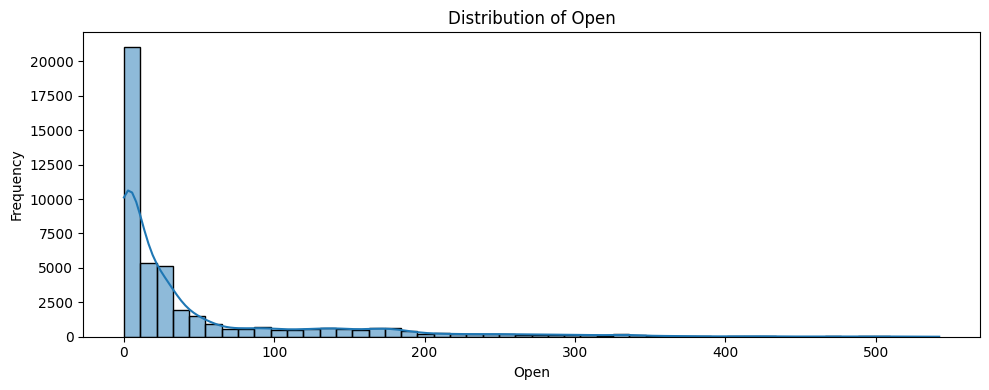

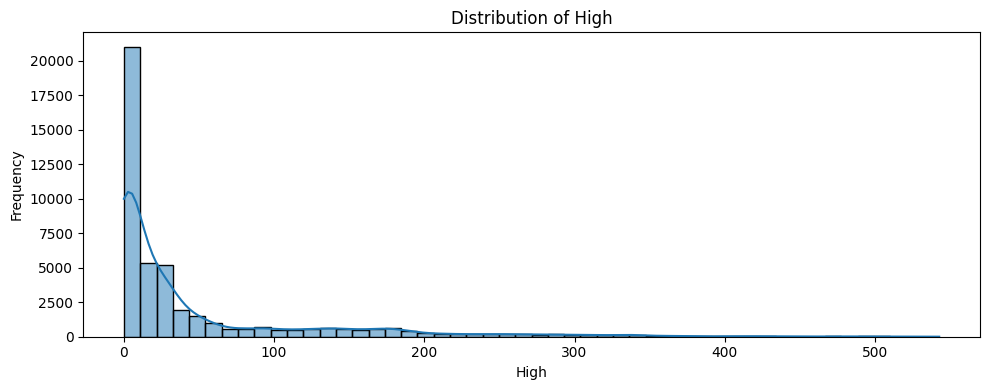

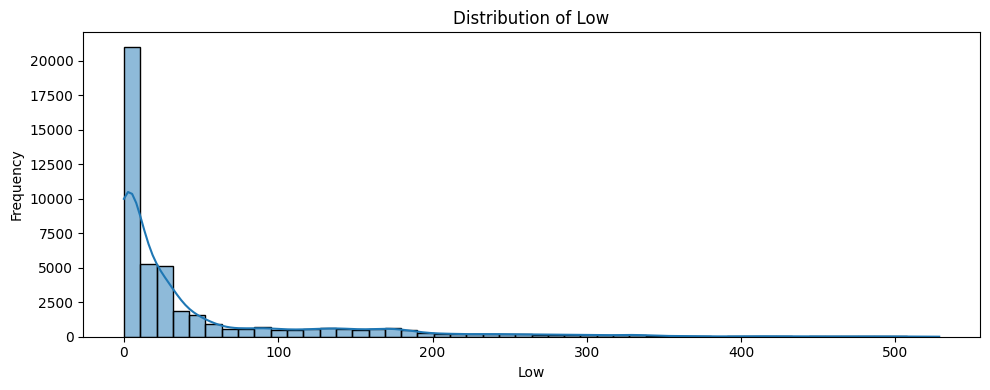

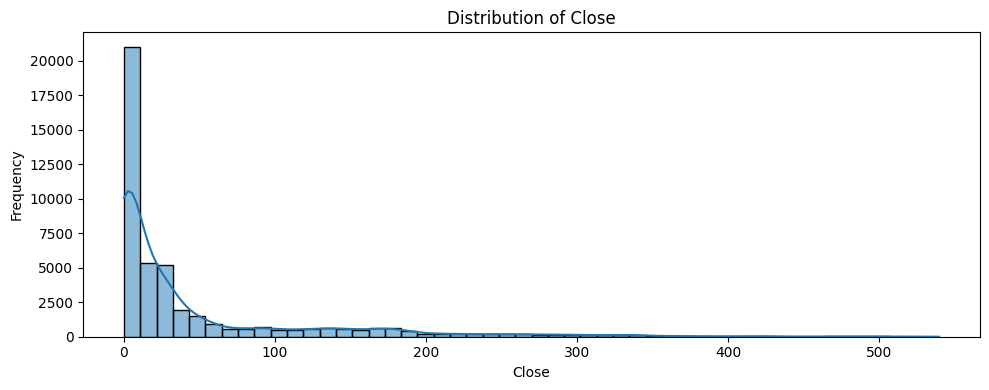

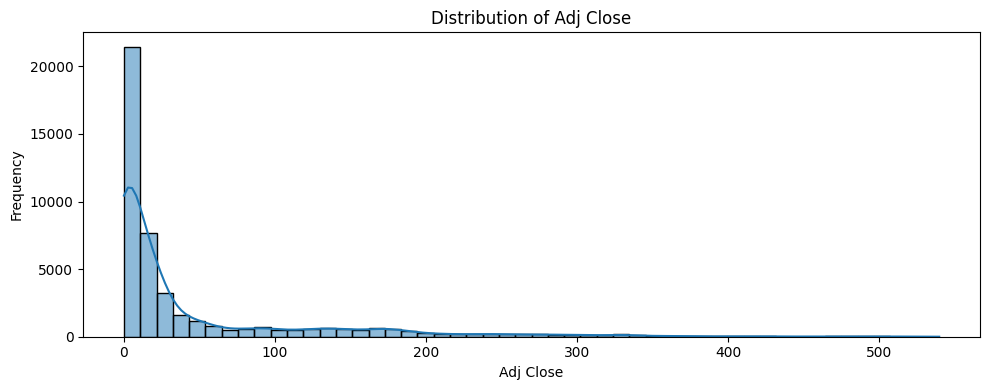

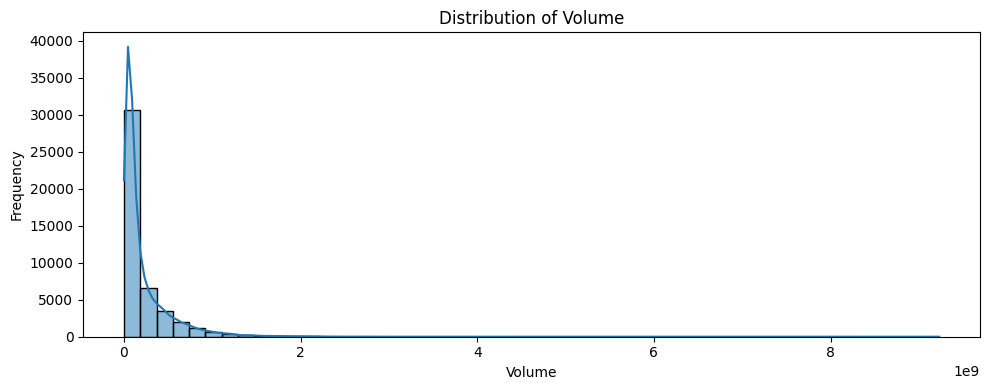

In [18]:
# Distribution plots
numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(all_stocks_df[feature], kde=True, bins=50)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

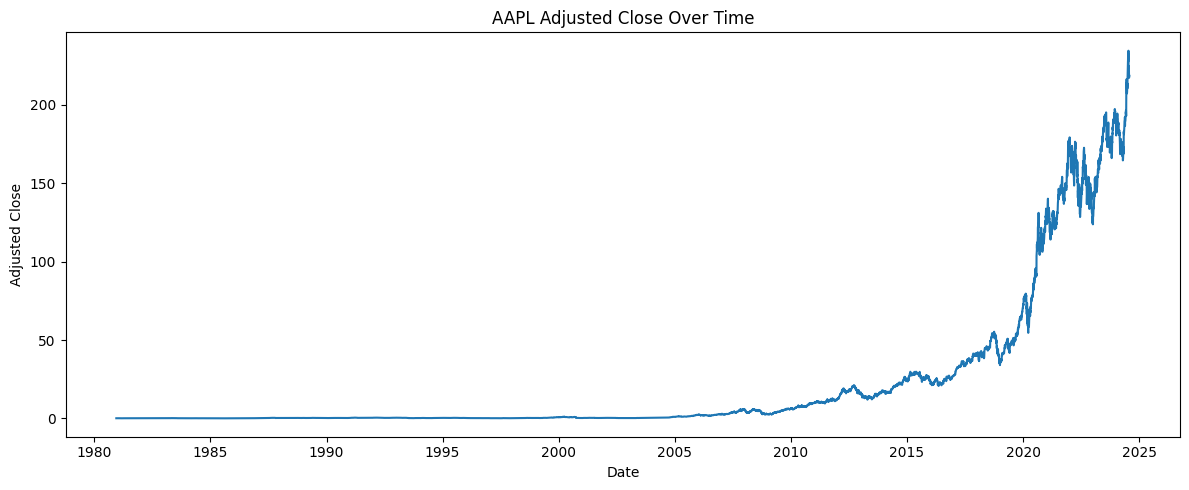

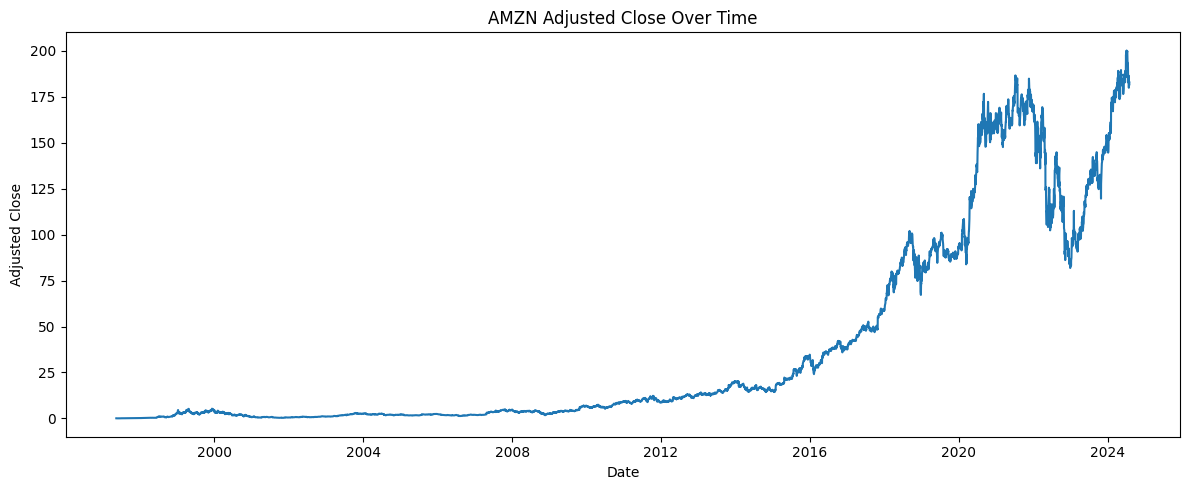

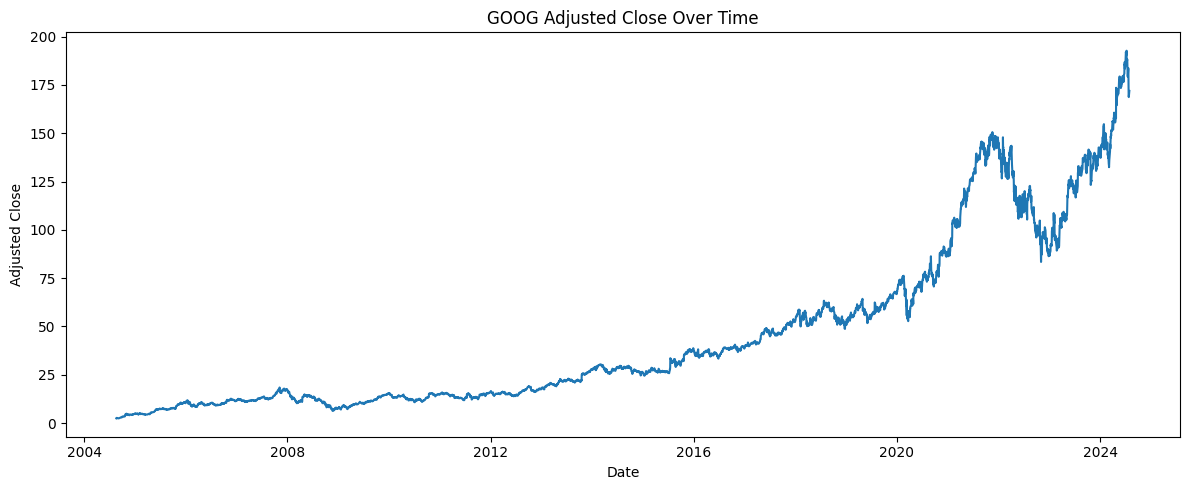

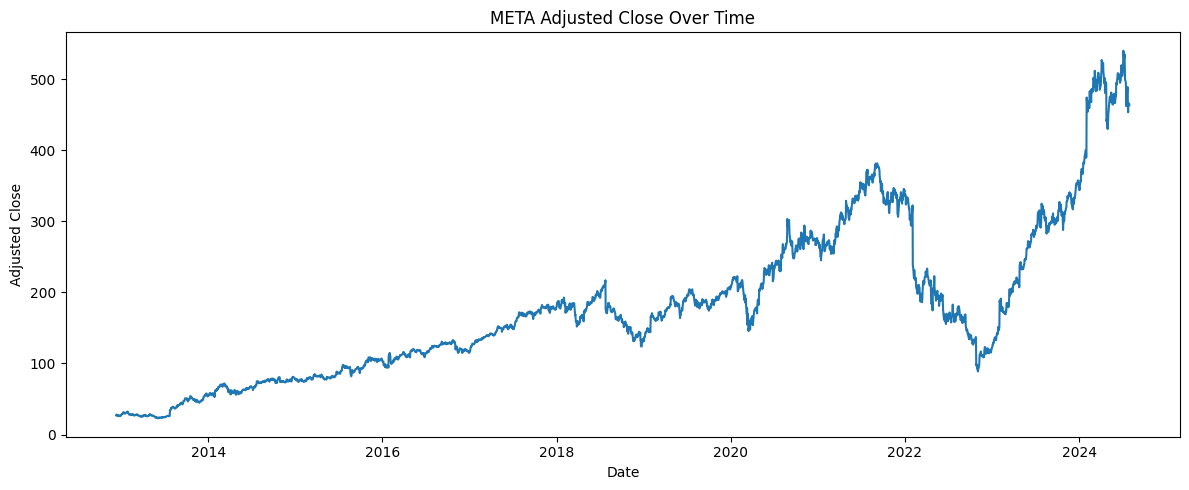

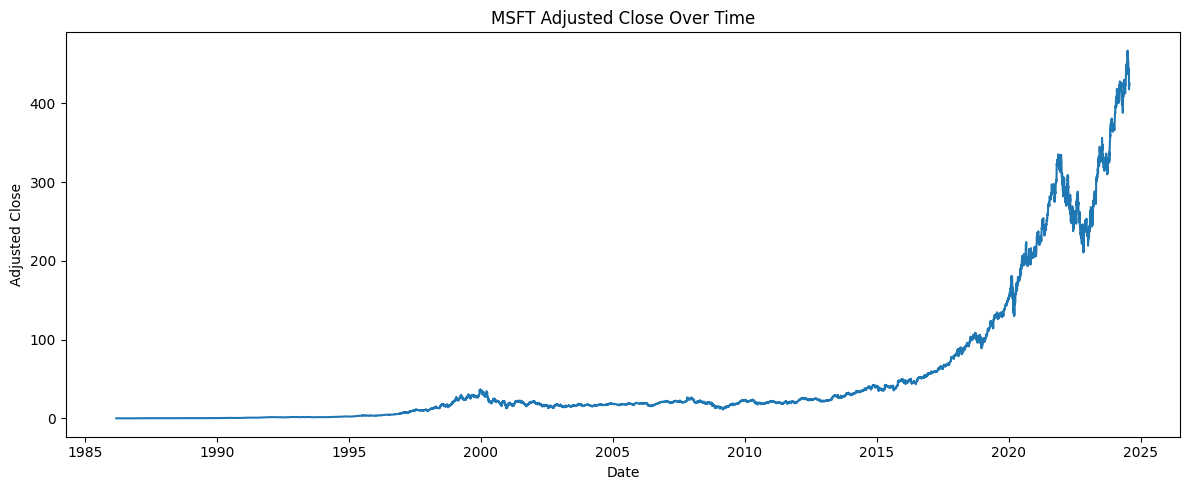

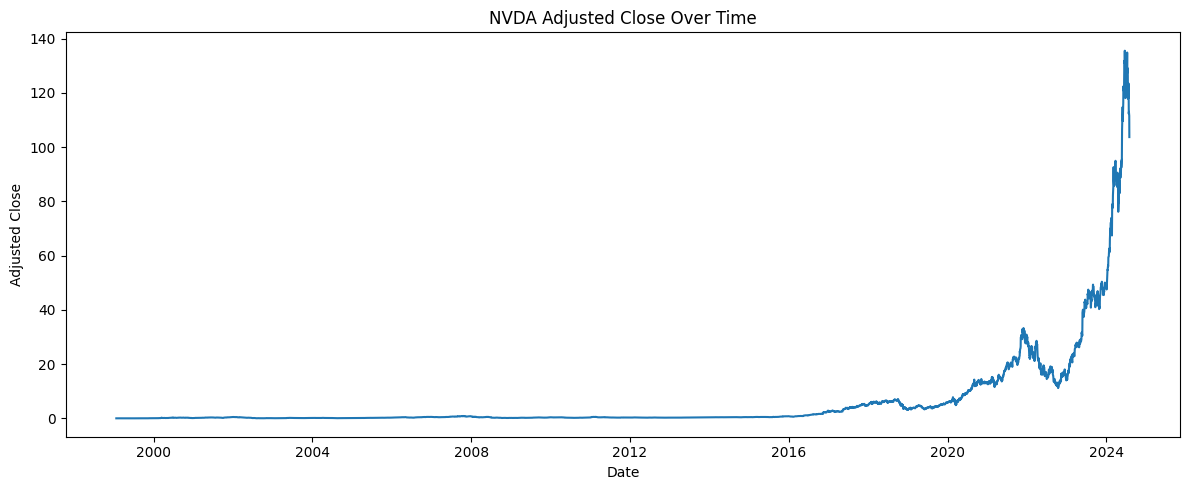

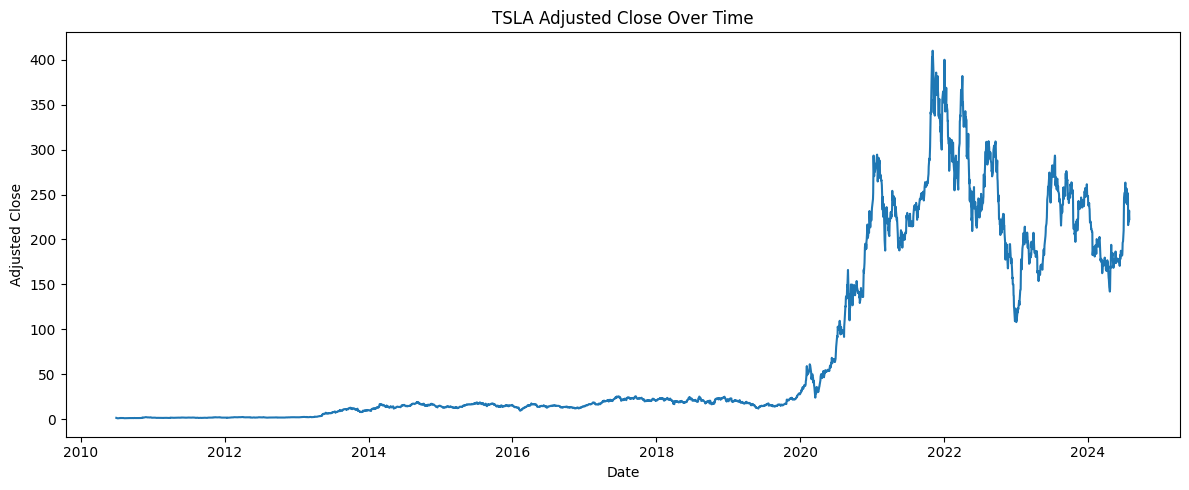

In [19]:
# Time series plots
for stock in stocks_data:
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=stocks_data[stock], x='Date', y='Adj Close')
    plt.title(f"{stock} Adjusted Close Over Time")
    plt.xlabel("Date")
    plt.ylabel("Adjusted Close")
    plt.tight_layout()
    plt.show()


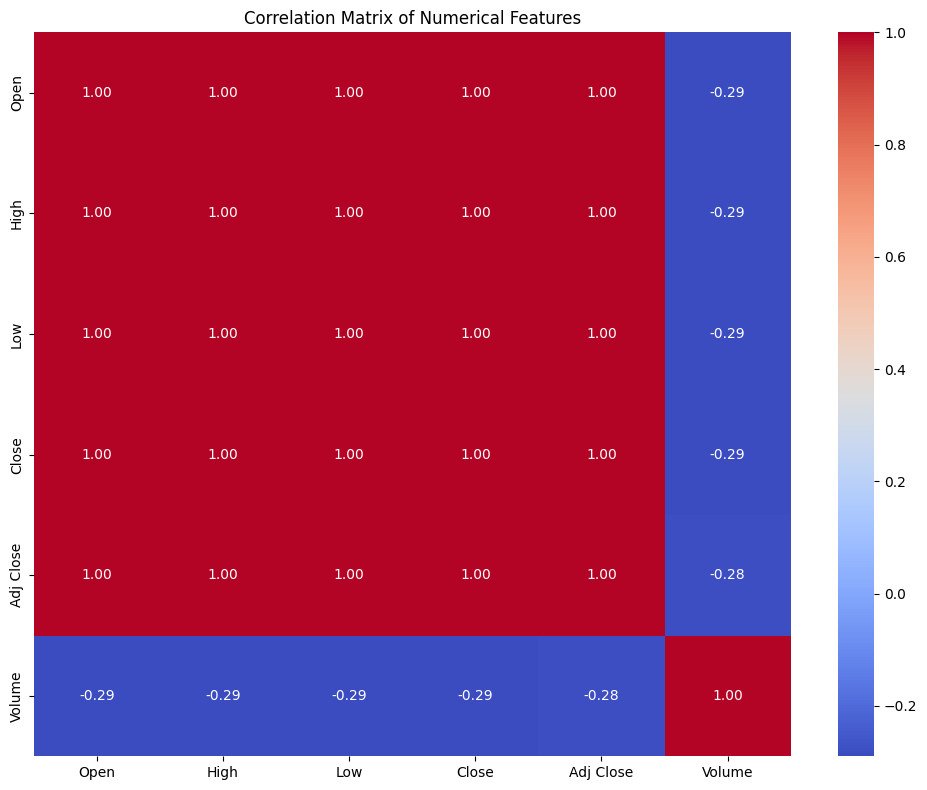

In [20]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(all_stocks_df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

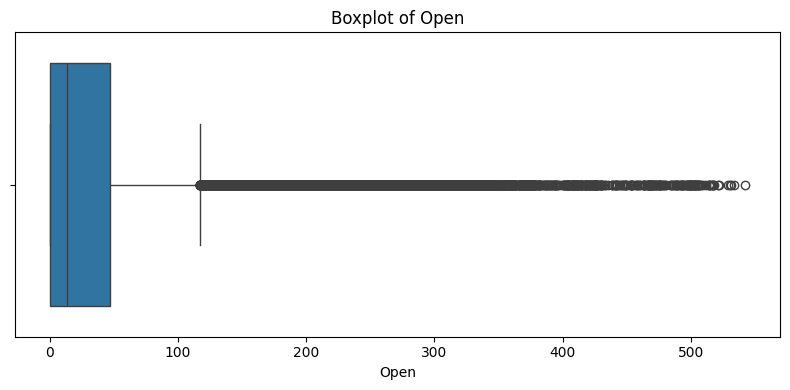

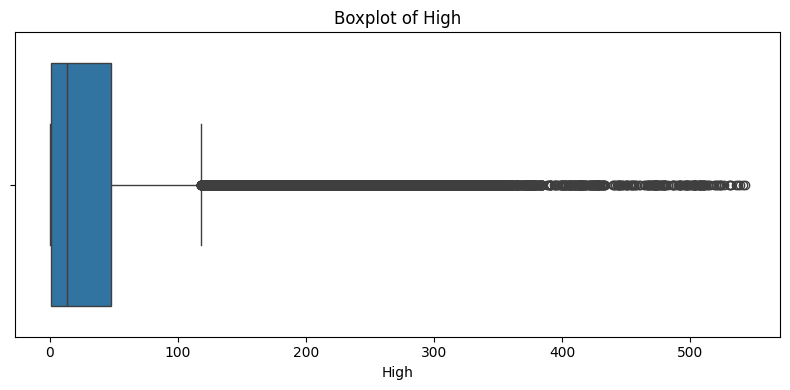

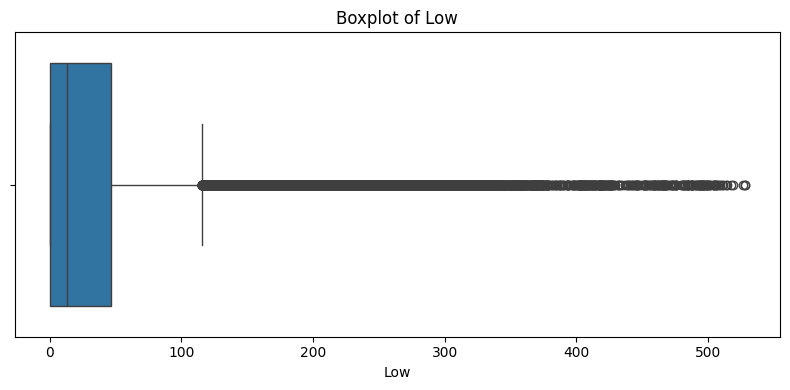

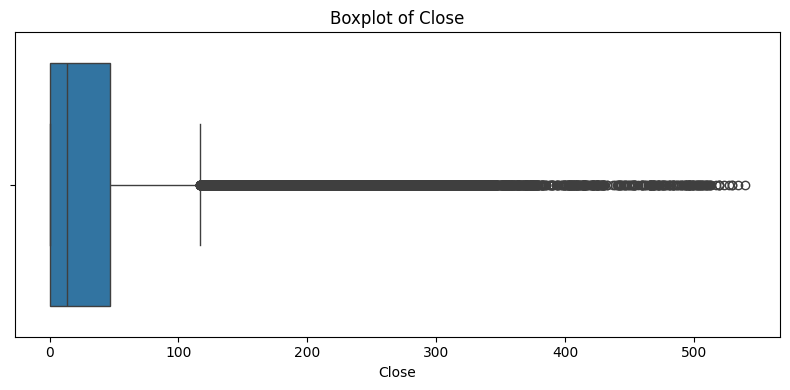

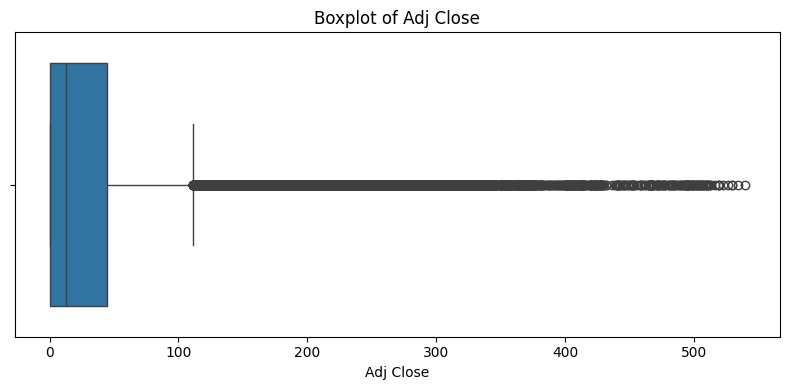

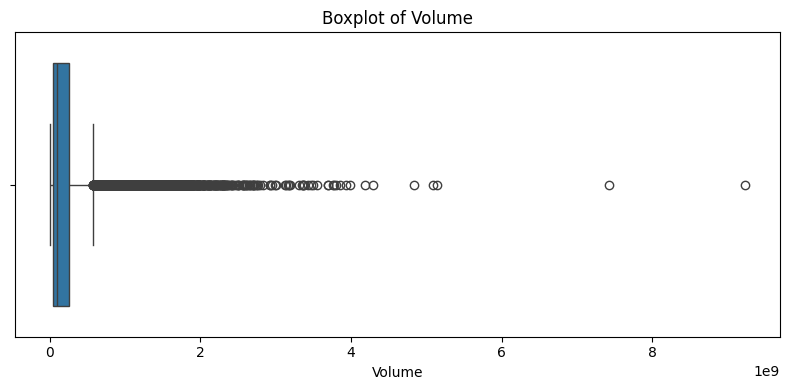

In [21]:
# Boxplots for outlier detection
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=all_stocks_df, x=feature)
    plt.title(f"Boxplot of {feature}")
    plt.tight_layout()
    plt.show()

In [22]:
# Data Cleaning: drop duplicates, fill/remove missing
initial_shape = all_stocks_df.shape
all_stocks_df.drop_duplicates(inplace=True)
print(f"Removed {initial_shape[0] - all_stocks_df.shape[0]} duplicate rows.")

Removed 0 duplicate rows.


In [23]:
# Handle missing values if any
all_stocks_df.fillna(method='ffill', inplace=True)
all_stocks_df.fillna(method='bfill', inplace=True)

# Save cleaned data
cleaned_file = data_path / "cleaned_all_stocks.csv"
all_stocks_df.to_csv(cleaned_file, index=False)
print(f"Cleaned data saved to {cleaned_file}")

C:\Users\Admin\AppData\Local\Temp\ipykernel_13372\2096134230.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_stocks_df.fillna(method='ffill', inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13372\2096134230.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_stocks_df.fillna(method='bfill', inplace=True)


Cleaned data saved to C:\Users\Admin\source\repos\KAIM\KAIM-Week1\Nova-Financial-Solutions-Week1\data\raw\cleaned_all_stocks.csv


In [25]:
# Load and inspect analyst ratings
tips_df = pd.read_csv(data_path / "raw_analyst_ratings.csv")

# Convert the date column using flexible format inference
tips_df['date'] = pd.to_datetime(tips_df['date'], format='mixed', errors='coerce')

print("\nAnalyst Ratings Sample:")
display(tips_df.head())

# Basic exploration of analyst ratings
print("\nAnalyst Ratings by Publisher:")
display(tips_df['publisher'].value_counts())



Analyst Ratings Sample:


C:\Users\Admin\AppData\Local\Temp\ipykernel_13372\1862491024.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  tips_df['date'] = pd.to_datetime(tips_df['date'], format='mixed', errors='coerce')


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A



Analyst Ratings by Publisher:


publisher
Paul Quintaro        168435
Lisa Levin           139785
Benzinga Newsdesk    111281
Charles Gross         72892
Monica Gerson         61374
                      ...  
Growth Aces               1
Stock Market Newz         1
Monetarex                 1
Junnan Guo                1
GeoInvesting              1
Name: count, Length: 984, dtype: int64

In [27]:
from wordcloud import WordCloud
from pathlib import Path

In [29]:
# Load data
data_path = Path("C:/Users/Admin/source/repos/KAIM/KAIM-Week1/Nova-Financial-Solutions-Week1/data/raw")  # Change as needed
ratings_df = pd.read_csv(data_path / "raw_analyst_ratings.csv")

# Convert date column with flexible format detection
ratings_df['date'] = pd.to_datetime(ratings_df['date'], format='mixed', errors='coerce')

# Drop any rows with null dates
ratings_df = ratings_df.dropna(subset=['date'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_13372\1218687319.py:6: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  ratings_df['date'] = pd.to_datetime(ratings_df['date'], format='mixed', errors='coerce')


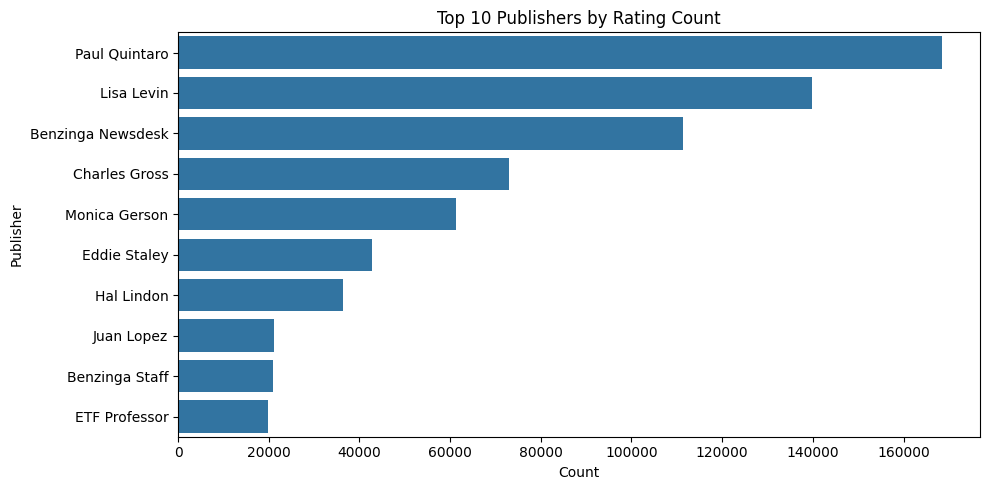

In [30]:
# === 1. Publisher Frequency ===
plt.figure(figsize=(10, 5))
sns.countplot(data=ratings_df, y='publisher', order=ratings_df['publisher'].value_counts().index[:10])
plt.title("Top 10 Publishers by Rating Count")
plt.xlabel("Count")
plt.ylabel("Publisher")
plt.tight_layout()
plt.show()

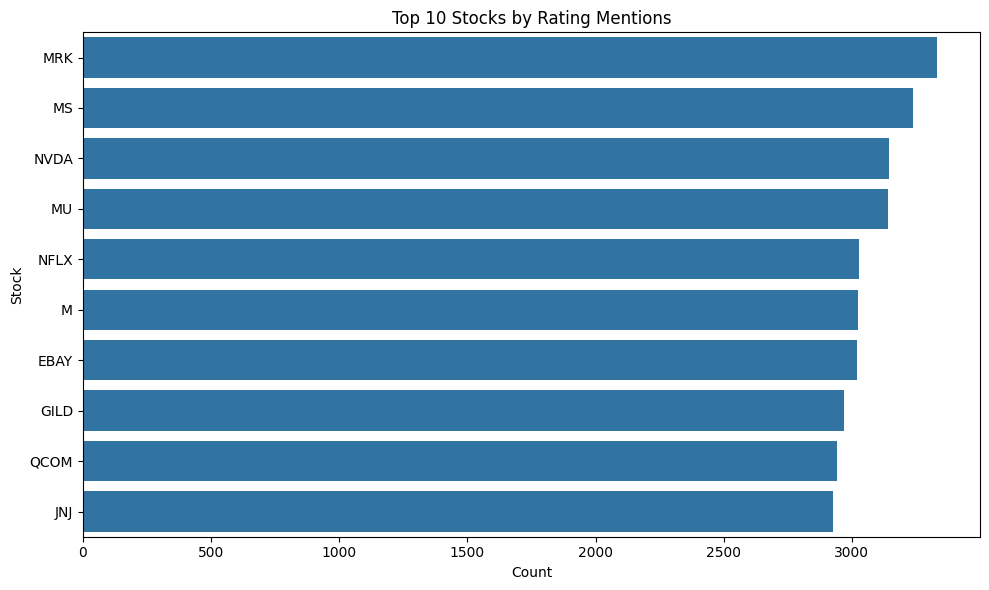

In [32]:
# === 3. Ratings per Stock ===
plt.figure(figsize=(10, 6))
sns.countplot(data=ratings_df, y='stock', order=ratings_df['stock'].value_counts().index[:10])
plt.title("Top 10 Stocks by Rating Mentions")
plt.xlabel("Count")
plt.ylabel("Stock")
plt.tight_layout()
plt.show()

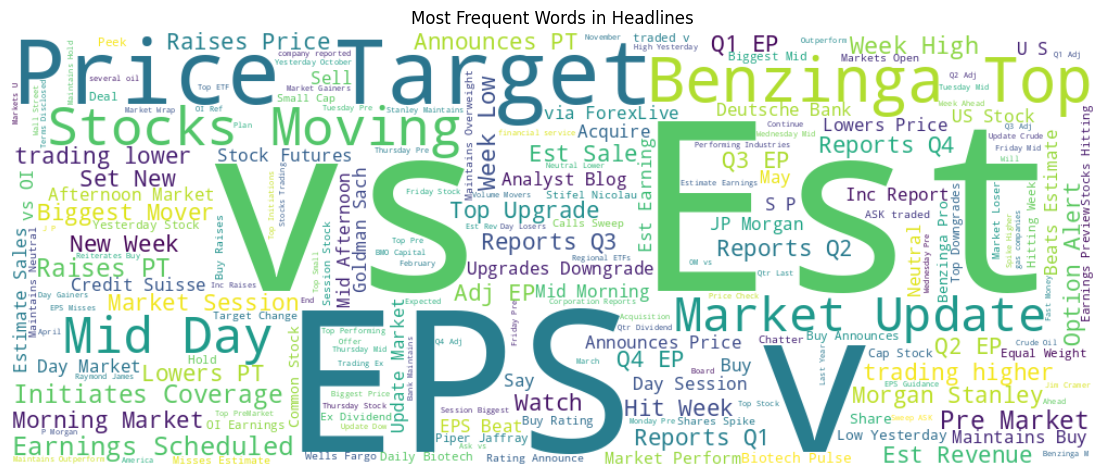

In [33]:
# === 4. Word Cloud from Headlines ===
all_headlines = ' '.join(str(h) for h in ratings_df['headline'].dropna())
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(all_headlines)

plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Headlines")
plt.show()